# An Application of jupyterlab-plotly

## Overview

Overview taken from plotly.py [readme](https://github.com/plotly/plotly.py/blob/master/README.md#overview) 

[plotly.py](https://plot.ly/python) is an interactive, open-source, and browser-based graphing library for Python

Built on top of [plotly.js](https://github.com/plotly/plotly.js), `plotly.py` is a high-level, declarative charting library. plotly.js ships with over 30 chart types, including scientific charts, 3D graphs, statistical charts, SVG maps, financial charts, and more.

Plotly tends to excel at making rich, **interactive** figures that are great for data exploration.

# Examples
Each example is taken off of the [plotly website](https://plotly.com/python/)

# 3D - Scatter Plot
The code below opens up an interactive cell to move around in

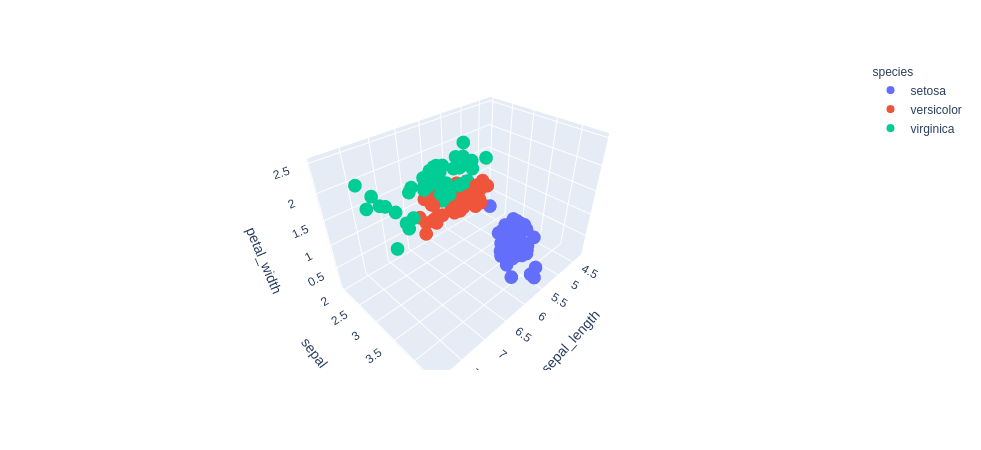

In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='species')
fig.show()

# 3D Scatter Plot with a Regression Surface

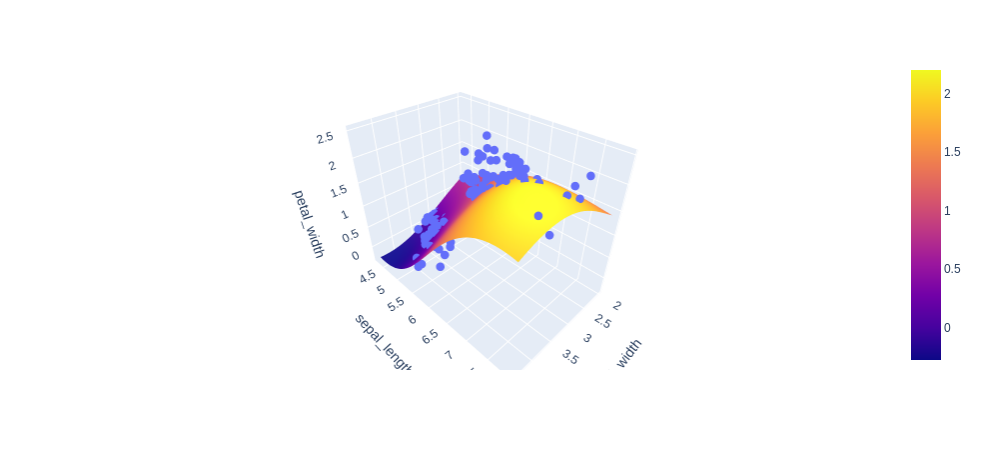

In [2]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

# Line Plots with Adjacent Histograms

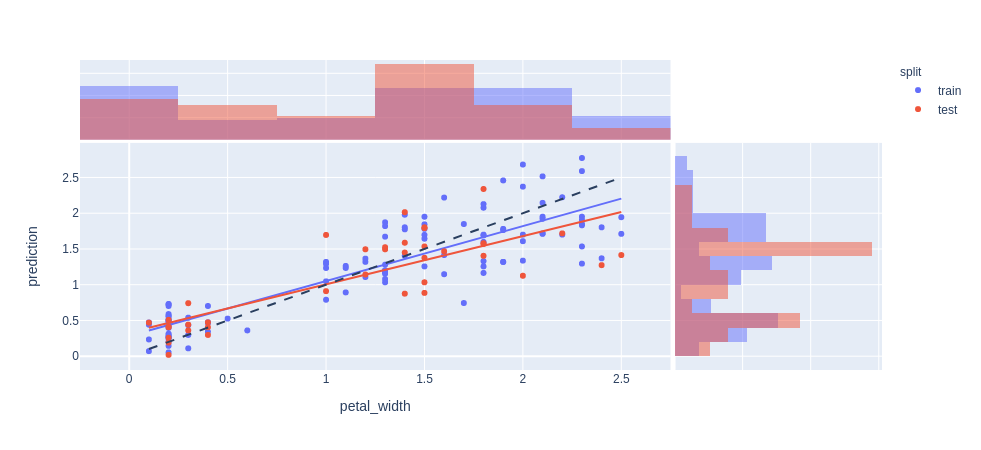

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and test splits
train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']
X_train = df.loc[train_idx, ['sepal_width', 'sepal_length']]
y_train = df.loc[train_idx, 'petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)

fig = px.scatter(
    df, x='petal_width', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type': 'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

# Bubble Map

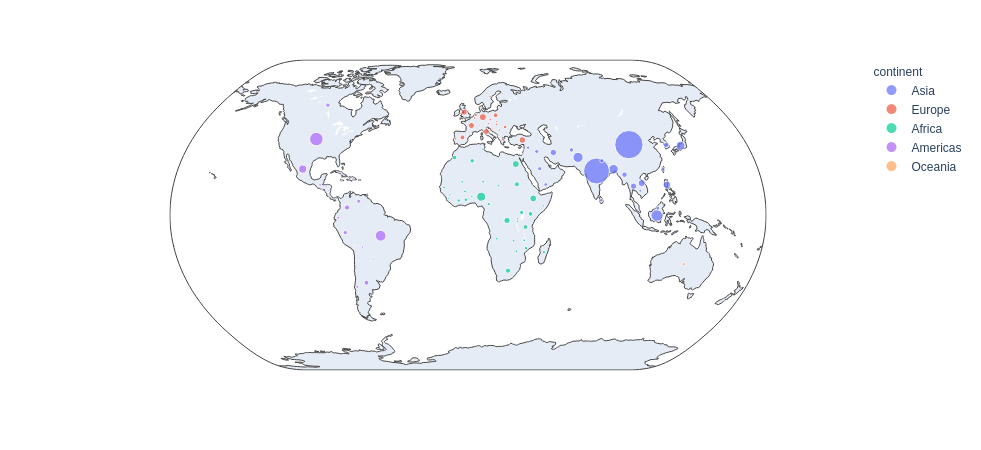

In [4]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()